In [1]:
%matplotlib inline

# Module 13 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

# The Problem

When we last left our agent in Module 4, it was wandering around a world filled with plains, forests, swamps, hills and mountains. This presupposes a map with known terrain:

```
......
...**.
...***
..^...
..~^..
```

but what if all we know is that we have some area of interest, that we've reduced to a GPS grid:

```
??????
??????
??????
??????
??????
```

and the agent has to determine what kind of terrain is to the left, front and right of it?

Assuming the agent has a very simple visual sensor that constructs a 4x4 grayscale image for each of the three directions, it might it could see something like this:

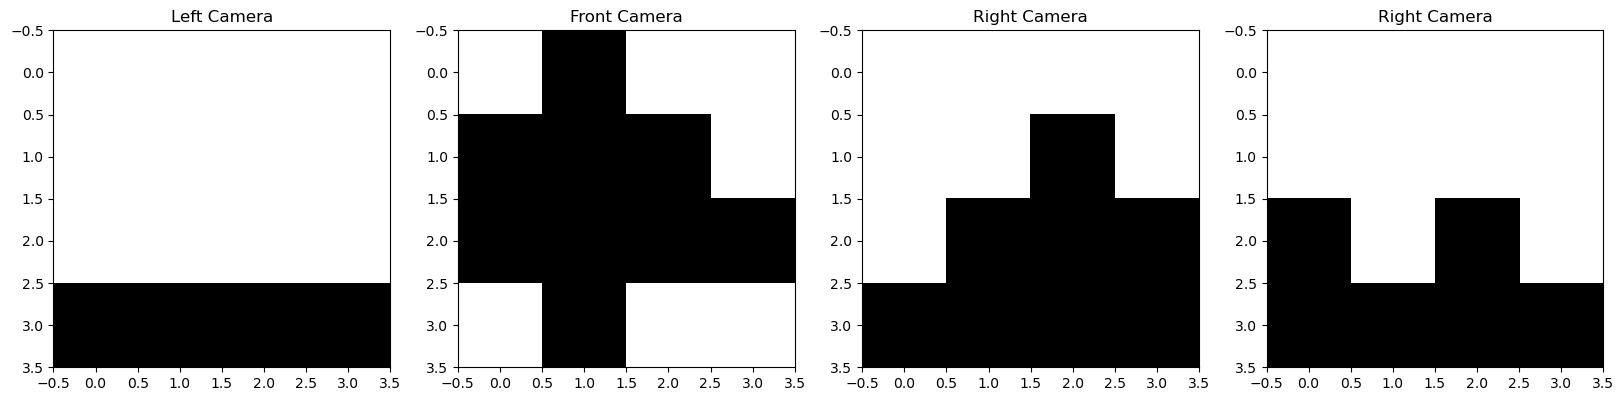

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

plain =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 1.0, 1.0, 1.0]
forest = [0.0, 1.0, 0.0, 0.0,1.0, 1.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0,0.0, 1.0, 0.0, 0.0]
hills =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0,0.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]
swamp =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0]

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 4, 1)
pixels = np.array([255 - p * 255 for p in plain], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Left Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 4, 2)
pixels = np.array([255 - p * 255 for p in forest], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Front Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 4, 3)
pixels = np.array([255 - p * 255 for p in hills], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')


axes = figure.add_subplot(1, 4, 4)
pixels = np.array([255 - p * 255 for p in swamp], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')

plt.show()
plt.close()

which would be plains, forest and hills respectively.


## The Assignment

In Assignment 12, we applied a logistic regression to determine if something was "hills" or "not hills". For this programming assignment your task is to write an artificial neural network that determines what kind of terrain it is. This is a multi-class problem.

For a starting point, you can refer to Pseudocode and the Self-Check.

## Data

As before, we have clean examples of the different types of terrain but based on the location, the registration can be a bit off for some of the types and the visual sensor is often blurry.

Here are the clean examples with different registrations: 

In [3]:
clean_data = {
    "plains": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, "plains"]
    ],
    "forest": [
        [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, "forest"],
        [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, "forest"]
    ],
    "hills": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, "hills"]
    ],
    "swamp": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "swamp"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, "swamp"]        
    ]
}

Let's create a function that allows us to view any of these:

In [4]:
def view_sensor_image( data):
    figure = plt.figure(figsize=(4,4))
    axes = figure.add_subplot(1, 1, 1)
    pixels = np.array([255 - p * 255 for p in data[:-1]], dtype='uint8')
    pixels = pixels.reshape((4, 4))
    axes.set_title( "Left Camera:" + data[-1])
    axes.imshow(pixels, cmap='gray')
    plt.show()
    plt.close()

"I think that I shall never see a thing so lovely as a tree."

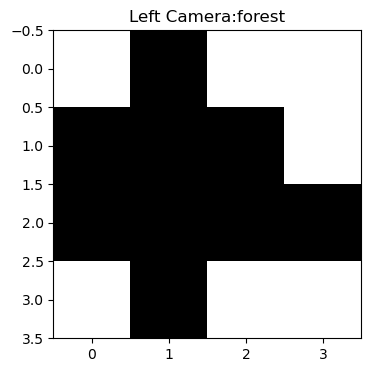

In [5]:
view_sensor_image( clean_data[ "forest"][0])

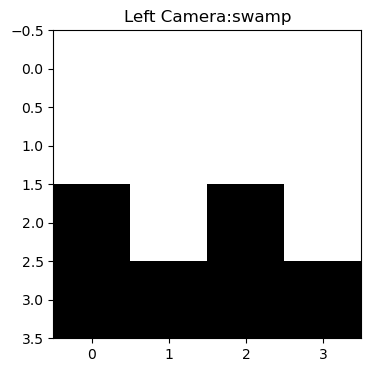

In [6]:
view_sensor_image( clean_data["swamp"][0])

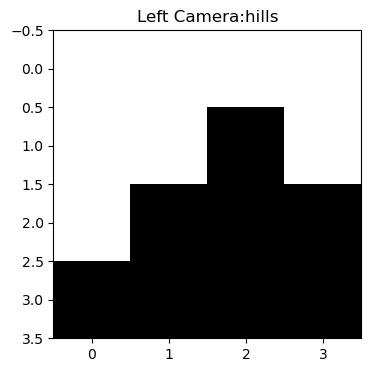

In [7]:
view_sensor_image( clean_data["hills"][0])

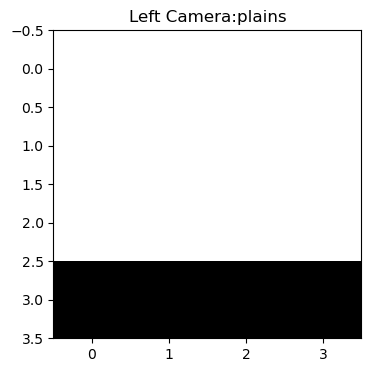

In [8]:
view_sensor_image( clean_data["plains"][0])

The data that comes in, however, is noisy. The values are never exactly 0 and 1. In order to mimic this we need a `blur` function.

We will assume that noise is normally distributed. For values that should be 0, the noisy values are distributed $N(0.10, 0.05)$. For values should be 1, the noisy values are distributed $N(0.9, 0.10)$.

In [9]:
def blur( data):
    def apply_noise( value):
        if value < 0.5:
            v = random.gauss( 0.10, 0.05)
            if v < 0.0:
                return 0.0
            if v > 0.75:
                return 0.75
            return v
        else:
            v = random.gauss( 0.90, 0.10)
            if v < 0.25:
                return 0.25
            if v > 1.00:
                return 1.00
            return v
    noisy_readings = [apply_noise( v) for v in data[0:-1]]
    return noisy_readings + [data[-1]]

We can see how this affects what the agent *actually* sees.

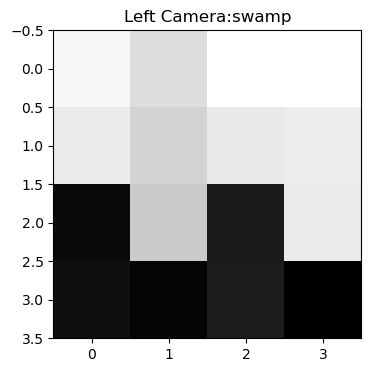

In [10]:
view_sensor_image( blur( clean_data["swamp"][0]))

You are going to want to write four (4) functions:

1. `generate_data`
2. `learn_model`
3. `apply_model`

### `generate_data`

With the clean examples and the `blur` function, we have an unlimited amount of data for training and testing our classifier, an ANN that determines if a sensor image is hills, swamp, forest or plains.

In classification, there is a general problem called the "unbalanced class problem". In general, we want our training data to have the same number of classes for each class. This means you should probably generate training data with, say, 100 of each type.

But what do we do about the class label with the neural network?

In this case, we can do "one hot". Instead of `generate_data` outputing a single 0 or 1, it should output a vector of 0's and 1's so that $y$ is now a vector as well as $x$. We can use the first position for hill, the second for swamp, the third for forest and the fourth for plains:

```
[0, 1, 0, 0]
```

what am I? swamp.

Unlike logistic regression, you should set the *biases* inside the neural network (the implict $x_0$ = 1) because there are going to be lot of them (one for every hidden and output node).

`generate_data` now only needs to take how many you want of each class:

`generate_data( clean_data, 100)`

generates 100 hills, 100 swamp, 100 forest, 100 plains and transforms $y$ into the respective "one hot" encoding. You can use the code from Module 12 as a starting point.

### `learn_model`

`learn_model` is the function that takes in training data and actually learns the ANN. If you're up to it, you can implement a vectorized version using Numpy but you might start with the loopy version first.

*In the lecture, I mentioned that you usually should mean normalize your data but you don't need to do that in this case because the data is already on the range 0-1.*

You should add a parameter to indicate how many nodes the hidden layer should have.

When verbose is True, you should print out the error so you can see that it is getting smaller.

When developing your algorithm, you need to watch the error so you'll set verbose=True to start. You should print it out every iteration and make sure it is declining. You'll have to experiment with both epsilon and alpha; and it doesn't hurt to make alpha adaptive (if the error increases, make alpha = alpha / 10).

When you know that your algorithm is working, change your code so that the error is printed out only every 1,000 iterations (it takes a lot of iterations for this problem to converge, depending on your parameter values--start early).

`learn_model` returns the neural network. The hidden layer will be one vector of thetas for each hidden node. And the output layer will have its own thetas, one for each output (4 in this case). Return it as a Tuple: (List of List, List of List).

### `apply_model`

`apply_model` takes the ANN (the model) and either labeled or unlabeled data. If the data is unlabeled, it will return predictions for each observation as a List of Tuples of the inferred value (0 or 1) and the actual probability (so something like (1, 0.73) or (0, 0.19) so you have [(0, 0.30), (1, 0.98), (0, 0.87), (0, 0.12)]. Note that unlike the logistic regression, the threshold for 1 is not 0.5 but which value is largest (0.98 in this case).

If the data is labeled, you will return a List of List of Tuples of the actual value (0 or 1) and the predicted value (0 or 1). For a single data point, you'll have the pairs of actual values [(0, 1), (0, 0), (0, 0), (1, 0)] is a misclassification and [(0, 0), (0, 0), (1, 1), (0, 0)] will be a correct classification. Then you have a List of *those*, one for each observation.

###  simple evaluation

We have an "unlimited" supply of data so we'll just generate a training set and then a test set and see how well our neural network does. Use the error rate (incorrect classifications/total examples) for your evaluation metric. We'll learn about more sophisticated 

1. generate training set (how many do you think you need?)
2. generate test set (how many is a good "test" of the network you built?)
3. loop over [2, 4, 8] hidden nodes:
    1. train model and apply to train data, calculate error rate.
    2. apply to test data and calculate error rate.
    3. print error rate
    
Which number of hidden nodes did best?

**As always when working with Lists or Lists of Lists, be very careful when you are modifying these items in place that this is what you intend (you may want to make a copy first)**

---

Put your helper functions above here.

## Main Functions

## `generate_data` <a id="generate_data"></a>

Generates an endless supply of blurred data from a collection of terrain prototypes.

* `data`: Dict[Str, List[Any]] - a Dictionary of "clean" prototypes for each landscape type.
* `n`: Int - the number of blurred examples of each terrain type to return.

returns

* List[List[Any]] - a List of Lists. Each individual List is a blurred example of a terrain type, generated from the prototype.

In [11]:
def generate_data(data, n):
    terrain_types = list(data.keys())
    generated = []
    
    for i, terrain in enumerate(terrain_types):
        one_hot_label = [1 if j == i else 0 for j in range(len(terrain_types))]
        for _ in range(n):
            clean_sample = random.choice(data[terrain])
            blurred_sample = blur(clean_sample)
            generated.append((blurred_sample[:-1], one_hot_label))
    random.shuffle(generated)
    return generated


In [12]:

generated_data = generate_data(clean_data, 10)
assert(len(generated_data) == 40) # Should be 4 times the amount as 10 datapoints for each type of area
assert(generated_data[0][1] == [1, 0, 0, 0] or generated_data[0][1] == [0, 1, 0, 0] or generated_data[0][1] == [0, 0, 1, 0] or generated_data[0][1] == [0, 0, 0, 1]) # Should be a one hot encoded list of 4
assert(type(generated_data[0][0][0]) == float) #First one should almost always be blurred to a float instead of an int

## `sigmoid` <a id="sigmoid"></a>

Performs the sigmoid activation function. This is required to do feedforward for the ANN.

**Parameters:**  
* `x`: (`int`) - Number to be sigmoided

**Returns:**
* `float` - Value that has been sigmoided

In [13]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [14]:
assert(round(sigmoid(1), 3) == 0.731) # Simple sigmoid on 1, easily calculated
assert(0 <= sigmoid(2) <= 1) # Should always be between 0  and 1, replace with any value
assert(type(sigmoid(1) == float)) # Should be returning a float no matter what

## `sigmoid_derivative` <a id="sigmoid_derivative"></a>

Performs the derivative of the sigmoid activation function. This is required to do backpropogation for the ANN.

**Parameters:**  
* `output`: (`float`) - Number to be computed on

**Returns:**
* `float` - Value that has been computed

In [15]:
def sigmoid_derivative(output):
    return output * (1 - output)

In [16]:
assert(sigmoid_derivative(0.5) == 0.25) #Should be .25
assert(abs(sigmoid_derivative(0.01) - 0.0099)) == 0 # This should be the outcome
assert(abs(round(sigmoid_derivative(0.99), 4) - 0.0099)) == 0 # This should be the outcome, was adding a .0000000001 for some reason

## `feedforward` <a id="feedforward"></a>

Does the feedforward proces for the ANN. It computes the activations of the hidden and output layers based on the input values and the current weights. Necessary to train the ANN

**Parameters:**  
* `inputs`: (`List[float]`) - List of input features to be trained on including Bias 
* `hidden_weights`: (`List[List[float]]`) - Hidden weights for the feed forward network to utilize
* `output_weights`: (`List[List[float]]`) - Output weights for the feed forward network to utilize

**Returns:**
* `hidden_activations`: (`List[float]`) - Computed activations for the hidden layer neurons
* `output_activations`: (`List[float]`) - Computed activations for the output layer neurons

In [17]:
def feedforward(inputs, hidden_weights, output_weights):
    """Perform feedforward propagation."""
    hidden_activations = [sigmoid(sum(w * inp for w, inp in zip(weights, inputs))) for weights in hidden_weights]
    hidden_activations.append(1)  # Bias for next layer
    output_activations = [sigmoid(sum(w * h for w, h in zip(weights, hidden_activations))) for weights in output_weights]
    return hidden_activations, output_activations

In [18]:
inputs = [0.5, 0.8, 1] 
hidden_weights = [[0.2, -0.5, 0.1], [0.7, 0.3, -0.2]] 
output_weights = [[0.4, -0.1, 0.6]] 

tuple_of_activations = feedforward(inputs, hidden_weights, output_weights)
hidden_activations, output_activations = tuple_of_activations

assert(type(tuple_of_activations) == tuple) # Should return a tuple
assert(1 in hidden_activations) # 1 sould still be in here for bias
assert(not output_activations == []) # No matter what should have something in the lsit for output_activations

## `backpropagate` <a id="backpropagate"></a>

Does the backpropagate proces for the ANN. It propagates errors backward through the network to update the weights during training. Necessary to train the ANN

**Parameters:**  
* `inputs`: (`List[float]`) - List of input features to be trained on including Bias 
* `hidden_activations`: (`List[float]`) - Computed activations for the hidden layer neurons
* `output_activations`: (`List[float]`) - Computed activations for the output layer neurons
* `y`: (`List[float]`) - Target output values for given input
* `hidden_weights`: (`List[List[float]]`) - Hidden weights for the feed forward network to utilize
* `output_weights`: (`List[List[float]]`) - Output weights for the feed forward network to utilize

**Returns:**
* `output_deltas`: (`List[float]`) - Error gradients for the output layer neurons
* `hidden_deltas`: (`List[float]`) - Error gradients for the output layer neurons

In [19]:
def backpropagate(inputs, hidden_activations, output_activations, y, hidden_weights, output_weights):
    """Compute deltas for backpropagation."""
    output_deltas = [(t - o) * sigmoid_derivative(o) for t, o in zip(y, output_activations)]
    hidden_deltas = [
        sum(output_deltas[o] * output_weights[o][h] for o in range(len(output_deltas))) * sigmoid_derivative(hidden_activations[h])
        for h in range(len(hidden_weights))
    ]
    return output_deltas, hidden_deltas

In [20]:
inputs = [0.5, 0.8, 1]  
hidden_activations = [0.6, 0.7, 1]  
output_activations = [0.4]  
y = [1] 

hidden_weights = [[0.2, -0.5, 0.1], [0.7, 0.3, -0.2]]  
output_weights = [[0.4, -0.1, 0.6]] 

tuple_of_deltas = backpropagate(inputs, hidden_activations, output_activations, y, hidden_weights, output_weights)
output_deltas, hidden_deltas = tuple_of_deltas

assert(type(tuple_of_deltas) == tuple) # Should return a tuple
assert(1 not in hidden_deltas) # 1 sould not be in here from bias
assert(not output_deltas == []) # No matter what should have something in the lsit for output_activations

## `update_weights` <a id="update_weights"></a>

Adjusts the weights of the ANN during training by applying the deltas calculated in the backpropagation process.

**Parameters:**  
* `hidden_weights`: (`List[List[float]]`) - Hidden weights for the feed forward network to utilize
* `output_weights`: (`List[List[float]]`) - Output weights for the feed forward network to utilize
* `inputs`: (`List[float]`) - List of input features to be trained on including Bias 
* `hidden_activations`: (`List[float]`) - Computed activations for the hidden layer neurons
* `output_deltas`: (`List[float]`) - Error gradients for the output layer neurons
* `hidden_deltas`: (`List[float]`) - Error gradients for the output layer neurons
* `alpha`: (`float`) - Learning rate that determines size of weight adjustments

In [21]:
def update_weights(hidden_weights, output_weights, inputs, hidden_activations, output_deltas, hidden_deltas, alpha):
    """Update weights using deltas."""
    for i, weights in enumerate(output_weights):
        for j in range(len(weights)):
            weights[j] += alpha * output_deltas[i] * hidden_activations[j]
    for i, weights in enumerate(hidden_weights):
        for j in range(len(inputs)):
            weights[j] += alpha * hidden_deltas[i] * inputs[j]

In [22]:
inputs = [0.5, 0.8, 1]  
hidden_activations = [0.6, 0.7, 1]  
output_deltas = [0.2]
hidden_deltas = [0.1, -0.05] 
alpha = 0.01  

hidden_weights = [[0.2, -0.5, 0.1], [0.7, 0.3, -0.2]]  
output_weights = [[0.4, -0.1, 0.6]]  

update_weights(hidden_weights, output_weights, inputs, hidden_activations, output_deltas, hidden_deltas, alpha)
should_be_none = update_weights(hidden_weights, output_weights, inputs, hidden_activations, output_deltas, hidden_deltas, alpha)
hidden_weights_before = [[0.2, -0.5, 0.1], [0.7, 0.3, -0.2]] 
output_weights_before = [[0.4, -0.1, 0.6]] 

assert(should_be_none == None) # Function shouldnt be returning anything
assert(not hidden_weights == hidden_weights_before) # Hidden weights updated
assert(not output_weights == output_weights_before) # Output weights updated

## `learn_model` <a id="learn_model"></a>

Trains a neural network using stochastic gradient descent.

**Parameters:**
* `data`: (`List[List[float]]`) - Training data where each row contains features followed by a label
* `hidden_nodes`: (`int`) - Number of nodes in the hidden layer
* `verbose`: (`bool`) - If True, print training progress

Returns:
* `hidden_weights`: (`List[List[float]]`) - Hidden weights of the model
* `output_weights`: (`List[List[float]]`) - Output weights of the model

In [23]:
def learn_model(data, hidden_nodes, verbose=False):
    input_size = len(data[0][0])  
    output_size = len(data[0][1])  

    hidden_weights = [[random.uniform(-1, 1) for _ in range(input_size + 1)] for _ in range(hidden_nodes)]
    output_weights = [[random.uniform(-1, 1) for _ in range(hidden_nodes + 1)] for _ in range(output_size)]
    alpha = 0.01
    prev_error = float('inf')

    for epoch in range(50000):
        total_error = 0
        for x, y in data:
            inputs = x + [1]  # Add bias
            hidden_activations, output_activations = feedforward(inputs, hidden_weights, output_weights)
            output_deltas, hidden_deltas = backpropagate(inputs, hidden_activations, output_activations, y, hidden_weights, output_weights)
            update_weights(hidden_weights, output_weights, inputs, hidden_activations, output_deltas, hidden_deltas, alpha)
            total_error += sum((t - o) ** 2 for t, o in zip(y, output_activations))
        
        if verbose and epoch % 1000 == 0:
            print(f"Epoch {epoch}, Error: {total_error:.6f}")

        if abs(prev_error - total_error) < 0.01:
            break

        prev_error = total_error

    return hidden_weights, output_weights

In [24]:
data = [
    ([[0.5, 0.8], [1, 0]]),
    ([[0.2, 0.3], [0, 1]])   
]

hidden_nodes = 2

hidden_weights, output_weights = learn_model(data, hidden_nodes)

assert(all(-1 <= w <= 1 for layer in hidden_weights for w in layer)) # All should be within -1 to 1
assert(all(-1 <= w <= 1 for layer in output_weights for w in layer)) # All should be within -1 to 1
assert(len(hidden_weights) == hidden_nodes) # Weights should have same length as hidden nodes

## `apply_model` <a id="apply_model"></a>

Apply the trained model to test data and predict class labels.

**Parameters:**
* `model`: (`Tuple[List[List[float]], List[List[float]]]`) - Trained weights for hidden and output layers.
* `test_data`: (`List[List[float]]`) - Test examples, each row being a feature vector.
* `labeled`: `bool` - If True, test_data includes labels as the last element of each row.

Returns:
* `predictions`: (`List[List[tuple]]`) - predictions made by the model

In [25]:
def apply_model(model, test_data, labeled=False):
    hidden_weights, output_weights = model
    predictions = []

    for example in test_data:
        x, true_label = example
        if not labeled:
            true_label = None

        inputs = list(x) + [1]

        hidden_activations = [sigmoid(sum(w * inp for w, inp in zip(weights, inputs))) for weights in hidden_weights]
        hidden_activations.append(1)  
        output_activations = [sigmoid(sum(w * h for w, h in zip(weights, hidden_activations))) for weights in output_weights]

        predicted_label = output_activations.index(max(output_activations))

        if not labeled:
            prediction = [(1 if i == output_activations.index(max(output_activations)) else 0, prob) for i, prob in enumerate(output_activations)]
            predictions.append(prediction)
        else:
            actual_predicted_pairs = [(actual, 1 if idx == predicted_label else 0) for idx, actual in enumerate(true_label)]
            predictions.append(actual_predicted_pairs)

    return predictions

In [26]:
hidden_weights = [[0.5, -0.3, 0.1], [0.8, 0.2, -0.4]]  
output_weights = [[0.7, -0.1, 0.6], [0.2, 0.5, -0.3]]  
model = (hidden_weights, output_weights)

test_data_labeled = [
    ([0.6, 0.4], [1, 0]),  
    ([0.1, 0.9], [0, 1])  
]

test_data_unlabeled = [
    ([0.6, 0.4], None),  
    ([0.1, 0.9], None)
]
predictions_labeled = apply_model(model, test_data_labeled, labeled=True)
predictions_unlabeled = apply_model(model, test_data_unlabeled, labeled=False)

assert(len(predictions_labeled) == len(test_data_labeled) and len(predictions_unlabeled) == len(test_data_labeled)) # Predictions should be len of test data
assert(predictions_labeled[0] == [(1, 1), (0, 0)]) # This should be correct each time, more checking that its adding the tuples correctly
assert(type(predictions_unlabeled[0][0][1]) == float) # Should be a percentage that it thinks it is correct so it should always be a float

Test out generate_data:

In [27]:
results = generate_data( clean_data, 10)
for result in results:
    print( result)

([0.17493746402465654, 0.06834771678409876, 0.23192639866183348, 0.07299694918714073, 0.061396601863972035, 0.14708623826073552, 0.07342957356255883, 0.07092299002931315, 0.07674426023479972, 0.0653635984202593, 0.1433844892072112, 0.05306886860797888, 0.8850532530444122, 0.9505628742337586, 0.6505611335968213, 0.7274926613274486], [1, 0, 0, 0])
([0.2348640269743383, 0.0, 0.9345440269181559, 0.18581396002176856, 0.051297489810928715, 0.9920740588564287, 1.0, 0.8158443977088461, 0.8809778081835941, 0.860468547859338, 1.0, 0.8480988778837354, 0.10132870672850776, 0.02685057485330071, 0.909431077294666, 0.13653861471435105], [0, 1, 0, 0])
([0.08282614625662205, 1.0, 0.09536220412101519, 0.022538150036783097, 0.8577183263395575, 0.7824841501419636, 0.9305252816482567, 0.13601295586908438, 0.9224369278961017, 0.8799602283413498, 0.8703178034018497, 1.0, 0.03182529241271813, 0.987053649331213, 0.099387378079334, 0.0895048365855707], [0, 1, 0, 0])
([0.1571457811692708, 0.20562645828844092, 0.

Use `generate_data` to generate 100 blurred examples of each type (all four terrains).

In [28]:
train_data = generate_data( clean_data, 100)

Use `learn_model` to learn a ANN model for classifying sensor images as hills, swamps, plains or forest. **Set Verbose to True**

In [29]:
model = learn_model( train_data, 2, True)

Epoch 0, Error: 429.036751
Epoch 1000, Error: 51.116940
Epoch 2000, Error: 8.628031


Use `generate_data` to generate 100 blurred examples of each terrain and use this as your test data.

In [30]:
test_data = generate_data( clean_data, 100)

Apply the model and evaluate the results.

In [31]:
results = apply_model( model, test_data, True)
print( results) # Error rate calculated below

[[(0, 0), (0, 0), (1, 1), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 0), (1, 1), (0, 0)], [(0, 0), (1, 1), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (1, 1), (0, 0), (0, 0)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 0), (1, 1), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (1, 1), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (1, 1), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(0, 0), (0, 0), (1, 1), (0, 0)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (1, 1), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 0), (0, 0), (1, 1)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(1, 1), (0, 0), (0, 0), (0, 0)], [(0, 0), (0, 

## `calculate_error_rate` <a id="calculate_error_rate"></a>

Calculate error rate based on predictions and true labels. Helps determine model performance

**Parameters:**
* `predictions`: (`List[List[tuple]]`) - Predictions made by the model
* `true_data`: (`List[List[tuple]]`) - True data values to check agains

Returns:
* `float` - Error rate of the model

In [32]:
def calculate_error_rate(predictions):
    incorrect_count = 0
    total = len(predictions)

    for pred in predictions:
        true_label_idx = [p[0] for p in pred].index(1)
        predicted_label_idx = max(enumerate(pred), key=lambda x: x[1][1])[0]
        if predicted_label_idx != true_label_idx:
                incorrect_count += 1

    return incorrect_count / total


In [33]:
predictions_labeled = [
    [(1, 1), (0, 0), (0, 0)], 
    [(0, 0), (1, 1), (0, 0)],  
    [(0, 0), (1, 0), (0, 0)] 
]

predictions_unlabeled = [
    [(1, 0.8), (0, 0.1), (0, 0.1)], 
    [(0, 0.1), (1, 0.7), (0, 0.2)], 
    [(0, 0.4), (1, 0.5), (0, 0.1)]   
]

labeled_error_rate = calculate_error_rate(predictions_labeled)
unlabeled_error_rate = calculate_error_rate(predictions_unlabeled)
assert(round(labeled_error_rate, 2) == 0.33) # Should be right 1/3 of the time
assert(round(unlabeled_error_rate, 2) == 0.0) # Should be perfect

bad_predictions_unlabeled = [
    [(1, 0.1), (0, 0.8), (0, 0.1)], 
    [(0, 0.8), (1, 0.1), (0, 0.2)], 
    [(0, 0.6), (1, 0.5), (0, 0.1)]   
]

assert(calculate_error_rate(bad_predictions_unlabeled) == 1.0) # Should not be right at all

In [35]:
test_data_true = []
for example in test_data:
    x, train_true_point = example
    test_data_true.append(train_true_point)
error_rate = calculate_error_rate(results)
print(error_rate)

0.0


Now that you're pretty sure your algorithm works (the error rate during training is going down, and you can evaluate `apply_model` results for its error rate), you need to determine what the best number of hidden nodes is.

Try 2, 4, or 8 hidden nodes and indicate the best one. Follow the outline above under "Simple Evaluation".
In the "real world", you could 10 fold cross validation and validation curves to determine the number of hidden nodes and possibly if you needed one or two hidden layers.

In [36]:
train_data = generate_data(clean_data, 100) 
test_data = generate_data(clean_data, 10000)

hidden_nodes_options = [2,4,8]
results = {}

for nodes in hidden_nodes_options:
    print(f"Testing with {nodes} hidden nodes...")
    
    model = learn_model(train_data, nodes, True)
    print(f"Model has finished learning.")
    train_results = apply_model(model, train_data, labeled=True)
    train_error_rate = calculate_error_rate(train_results)
    print(f"Train Error Rate: {train_error_rate}")

    test_results = apply_model(model, test_data, labeled=False)
    test_error_rate = calculate_error_rate(test_results)
    print(f"Test Error Rate: {test_error_rate}")

    # Store results
    results[nodes] = (train_error_rate, test_error_rate)

Testing with 2 hidden nodes...
Epoch 0, Error: 444.540254
Epoch 1000, Error: 40.173220
Epoch 2000, Error: 19.046307
Model has finished learning.
Train Error Rate: 0.0
Test Error Rate: 0.0
Testing with 4 hidden nodes...
Epoch 0, Error: 465.949385
Model has finished learning.
Train Error Rate: 0.0
Test Error Rate: 0.0
Testing with 8 hidden nodes...
Epoch 0, Error: 412.426388
Model has finished learning.
Train Error Rate: 0.0
Test Error Rate: 0.0


In [37]:
print(results)

{2: (0.0, 0.0), 4: (0.0, 0.0), 8: (0.0, 0.0)}


which number of hidden nodes is best? __8__

Based on my calculations any of these would have worked, while messing with values 8 seemed to be most likely to have a 0.0 for both most often.

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.

Honestly the biggest issue for me is I kept getting 0.0 for error rate. I dug into all of the values and I seemed to be getting correct responses back from the model so it seemed to be functioning correctly overall. I attempted to find if there was a data leak but I couldn't determine that. My best guess is that the patterns are fairly obvious so the model was able to accurately predict it a large majority of the time? However, it still seems too high to be correct, let me know if I completely missed something that was causing this.